Hello Naomi! this is a tutorial for you. lets hope it works because if it does i will send this file to you so that you can run it in your own free time!

## SETUP:

### Import Modules

Python install packages into our Colab Virtual Enviornment using inline terminal commands (prefixed with an ! )

In [0]:
%%capture
! pip install -U -q PyDrive
! pip install geopy
! pip install geopandas
! pip install geoplot

Now that the libraries have been installed. import them into our script here.

In [0]:
%%capture 
# These imports will handle everything
import os
import sys
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import psycopg2
import pyproj
from pyproj import Proj, transform
# conda install -c conda-forge proj4
from shapely.geometry import Point
from shapely import wkb
from shapely.wkt import loads
# https://pypi.org/project/geopy/
from geopy.geocoders import Nominatim

# In case file is KML, enable support
import fiona
fiona.drvsupport.supported_drivers['kml'] = 'rw'
fiona.drvsupport.supported_drivers['KML'] = 'rw'

### Configure Enviornment

This just makes things nice to look at

In [0]:
# This will just beautify the output

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('display.precision', 2)
pd.set_option('max_colwidth', 20)
# pd.reset_option('max_colwidth')

### (Optional) Local File Access

We uploaded our shapefile into google drive. this will give us file access to the drive.?

In [4]:
# (Optional) Run this cell to gain access to Google Drive (Colabs only) 
from google.colab import drive

# Colabs operates in a virtualized enviornment
# Colabs default directory is at ~/content.
# We mount Drive into a temporary folder at '~/content/drive' 

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now that we have access to the drive, lets change our file path to the location where our data is stored. (change directory = cd )

In [5]:
cd drive/'My Drive'/colabs/DATA/naomi

/content/drive/My Drive/colabs/DATA/naomi


list file contents in this directory to ensure we have what we need.

In [6]:
ls

Capa.cpg  Capa.dbf  Capa.prj  Capa.shp  Capa.shx  images/


## Retrieve GIS Data

Import the data using Geopandas.

In [0]:
# A Dataset taken from the public database provided by BNIAJFI hosted by Esro / ArcGIS
# BNIA ArcGIS Homepage: https://data-bniajfi.opendata.arcgis.com/
gdf = gpd.read_file("Capa.shp");

Observe the first few records

In [11]:
gdf.head(5)

,name,desc,TimeStamp,Photos,sym_name,geometry
0,I-1a,Rules & regs,2020-03-18,images/I-1a.jpg,Red Pin,POINT Z (-77.243...
1,I-2a,Welcome to your ...,2020-03-18,images/I-2a.jpg,Red Pin,POINT Z (-77.242...
2,I-3a,Directions,2020-03-18,images/I-3a.jpg,Red Pin,POINT Z (-77.238...
3,I-4a,Wildlife drive,2020-03-18,images/I-4a.jpg,Red Pin,POINT Z (-77.237...
4,I-5a,No digging,2020-03-18,images/I-5a.jpg,Red Pin,POINT Z (-77.236...


Ensure the data can be plotted

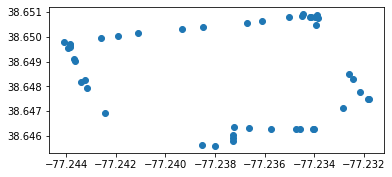

In [9]:
gdf.plot()

In [15]:
# lets take note of the Coordinate Reference System. We will need it when reuploding our data from CSV
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
# Save Data to User Specified File. Will save in the current folder. 
# If you didn't connect to drive then the file will disspear once the virtual enviornments session is closed.

import csv

outFile = input("Please enter the new Filename to save the data to ('acs_csa_merge_test': " )
gdf.to_csv(outFile+'.csv', index=False, quoting=csv.QUOTE_ALL) 

Please enter the new Filename to save the data to ('acs_csa_merge_test': shp2csv


Great. We just converted the shapefile to csv to remove any metadata that may be attached.

This approach loads a map using a geometry column

In [0]:
# The attributes are what we will use.
in_crs = 4326 # 2248 # The CRS we recieve our data 
out_crs = 4326 # The CRS we would like to have our data represented as
geom = 'geometry' # The column where our spatial information lives.

In [0]:
# A url to a public Dataset
url = 'shp2csv.csv'
# Read in the dataframe
df = pd.read_csv(url)

# Convert the geometry column datatype from a string of text into a coordinate datatype
df[geom] = df[geom].apply(lambda x: loads( str(x) ))

# Process the dataframe as a geodataframe with a known CRS and geom column
gdf = GeoDataFrame(df, crs=in_crs, geometry=geom)


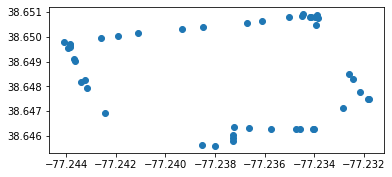

In [27]:
gdf.plot()

In [28]:
gdf.head(1)

,Unnamed: 0,name,desc,TimeStamp,Photos,sym_name,geometry
0,0,I-1a,Rules & regs,2020-03-18,images/I-1a.jpg,Red Pin,POINT Z (-77.243...


In [0]:
# Here is code to save this new projection as a shape file and read it back in
filename = 'new_naomi_test'
gdf = gdf.to_crs(epsg=2248) #just making sure
gdf.to_file(filename+'.shp', driver='ESRI Shapefile')
gdf = gpd.read_file(filename+'.shp')

In [31]:
gdf.count

<bound method DataFrame.count of     Unnamed_ 0    name                 desc   TimeStamp             Photos sym_name             geometry
0            0    I-1a         Rules & regs  2020-03-18    images/I-1a.jpg  Red Pin  POINT Z (1242822...
1            1    I-2a  Welcome to your ...  2020-03-18    images/I-2a.jpg  Red Pin  POINT Z (1243091...
2            2    I-3a           Directions  2020-03-18    images/I-3a.jpg  Red Pin  POINT Z (1244356...
3            3    I-4a       Wildlife drive  2020-03-18    images/I-4a.jpg  Red Pin  POINT Z (1244562...
4            4    I-5a           No digging  2020-03-18    images/I-5a.jpg  Red Pin  POINT Z (1244744...
5            5    I-6a           No digging  2020-03-18    images/I-6a.jpg  Red Pin  POINT Z (1244996...
6            6    I-7a           No digging  2020-03-18    images/I-7a.jpg  Red Pin  POINT Z (1245339...
7            7    I-8a  No digging & gov...  2020-03-18    images/I-8a.jpg  Red Pin  POINT Z (1245833...
8            8    I-9a